In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales_data_analysis.csv')
#Print the first 5 rows
print(df.head())

         Date          Time     Item Code  Quantity Sold (kilo)  \
0  2020-07-01  09:15:07.924  1.029000e+14                 0.396   
1  2020-07-01  09:17:27.295  1.029000e+14                 0.849   
2  2020-07-01  09:17:33.905  1.029000e+14                 0.409   
3  2020-07-01  09:19:45.450  1.029000e+14                 0.421   
4  2020-07-01  09:20:23.686  1.029000e+14                 0.539   

   Unit Selling Price (RMB/kg) Sale or Return Discount (Yes/No)  
0                          7.6           sale                No  
1                          3.2           sale                No  
2                          7.6           sale                No  
3                         10.0           sale                No  
4                          8.0           sale                No  


In [3]:
#Display the number of rows and columns

(763787, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763787 entries, 0 to 763786
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         763787 non-null  object 
 1   Time                         763787 non-null  object 
 2   Item Code                    763786 non-null  float64
 3   Quantity Sold (kilo)         763786 non-null  float64
 4   Unit Selling Price (RMB/kg)  763786 non-null  float64
 5   Sale or Return               763786 non-null  object 
 6   Discount (Yes/No)            763786 non-null  object 
dtypes: float64(3), object(4)
memory usage: 40.8+ MB


In [6]:
df.describe()

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
count,7.637860e+05,763786.000000,763786.000000
mean,1.030102e+14,0.518974,8.990031
std,6.589016e+11,0.404475,6.380159
min,1.029000e+14,-9.082000,0.100000
25%,1.029000e+14,0.284000,5.000000
50%,1.029000e+14,0.423000,8.000000
75%,1.029000e+14,0.671000,10.000000
max,1.069740e+14,160.000000,116.000000


In [5]:
quantity = df['Quantity Sold (kilo)'].value_counts()
print(quantity)

Quantity Sold (kilo)
1.000    102135
0.301      8213
0.251      7424
0.401      7290
0.351      6667
          ...  
2.564         1
2.821         1
1.870         1
2.602         1
2.680         1
Name: count, Length: 2747, dtype: int64


In [7]:
daily_total_sales=df.groupby('Date')['Quantity Sold (kilo)'].sum()
print(daily_total_sales)

Date
2020-07-01    404.346
2020-07-02    393.678
2020-07-03    385.018
2020-07-04    483.299
2020-07-05    516.917
               ...   
2023-01-15    787.396
2023-01-16    610.761
2023-01-17    612.673
2023-01-18    897.197
2023-01-19    132.406
Name: Quantity Sold (kilo), Length: 924, dtype: float64


In [8]:
total=df['Quantity Sold (kilo)'] * df['Unit Selling Price (RMB/kg)']
print(total)

0          3.0096
1          2.7168
2          3.1084
3          4.2100
4          4.3120
           ...   
763782     4.5000
763783     2.5130
763784     8.9424
763785    13.6440
763786        NaN
Length: 763787, dtype: float64


In [9]:
#Check for missing value in each column
missing =df.isnull().sum()
print(missing)

Date                           0
Time                           0
Item Code                      1
Quantity Sold (kilo)           1
Unit Selling Price (RMB/kg)    1
Sale or Return                 1
Discount (Yes/No)              1
dtype: int64


In [10]:
x = 'NaN'
df['Sale or Return'] = df['Sale or Return'].fillna(x)

In [11]:
y= 'NaN'
df['Discount (Yes/No)'] = df['Discount (Yes/No)'].fillna(y)


In [12]:
missing2 = df.isnull().sum()
print(missing2)

Date                           0
Time                           0
Item Code                      1
Quantity Sold (kilo)           1
Unit Selling Price (RMB/kg)    1
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64


***How do sales change over time?***

The line chart shows that daily total sales fluctuate significantly over time. Sales frequently rise above 500 units, with several peaks exceeding 700 units, while at other times dropping below 300 units. This indicates high variability in daily sales rather than a consistent upward or downward trend. Overall, sales exhibit periodic spikes and declines, suggesting demand varies across different days.



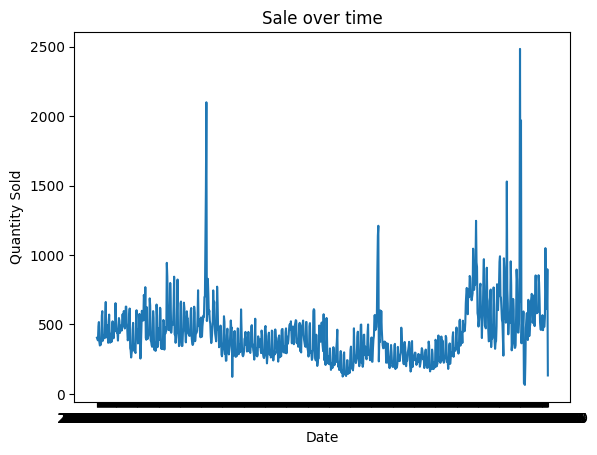

In [13]:
x=daily_total_sales.index
y=daily_total_sales

plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Sale over time')
plt.show()

In [14]:
discount = df.groupby('Discount (Yes/No)')['Quantity Sold (kilo)'].mean()
print(discount)
drop_col = discount.drop('NaN', errors='ignore')
print(drop_col)

Discount (Yes/No)
NaN         NaN
No     0.513098
Yes    0.630060
Name: Quantity Sold (kilo), dtype: float64
Discount (Yes/No)
No     0.513098
Yes    0.630060
Name: Quantity Sold (kilo), dtype: float64


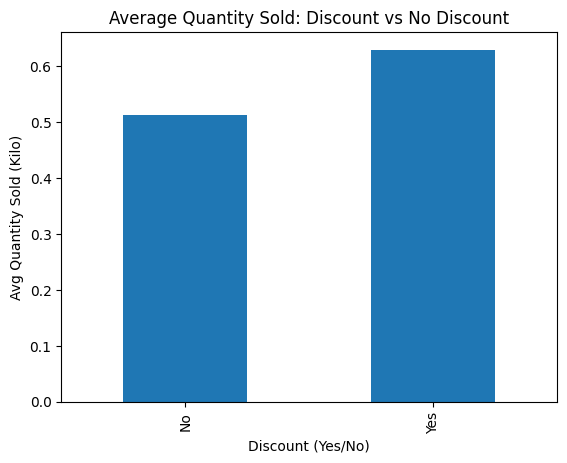

In [15]:
drop_col.plot(kind='bar')
plt.xlabel('Discount (Yes/No)')
plt.ylabel('Avg Quantity Sold (Kilo)')
plt.title('Average Quantity Sold: Discount vs No Discount')
plt.show()

In [16]:
df['Total Sale']=df['Quantity Sold (kilo)'] * df['Unit Selling Price (RMB/kg)']
print(df.head())

         Date          Time     Item Code  Quantity Sold (kilo)  \
0  2020-07-01  09:15:07.924  1.029000e+14                 0.396   
1  2020-07-01  09:17:27.295  1.029000e+14                 0.849   
2  2020-07-01  09:17:33.905  1.029000e+14                 0.409   
3  2020-07-01  09:19:45.450  1.029000e+14                 0.421   
4  2020-07-01  09:20:23.686  1.029000e+14                 0.539   

   Unit Selling Price (RMB/kg) Sale or Return Discount (Yes/No)  Total Sale  
0                          7.6           sale                No      3.0096  
1                          3.2           sale                No      2.7168  
2                          7.6           sale                No      3.1084  
3                         10.0           sale                No      4.2100  
4                          8.0           sale                No      4.3120  


Discount (Yes/No)
NaN         NaN
No     3.781256
Yes    3.449704
Name: Total Sale, dtype: float64
Discount (Yes/No)
No     3.781256
Yes    3.449704
Name: Total Sale, dtype: float64


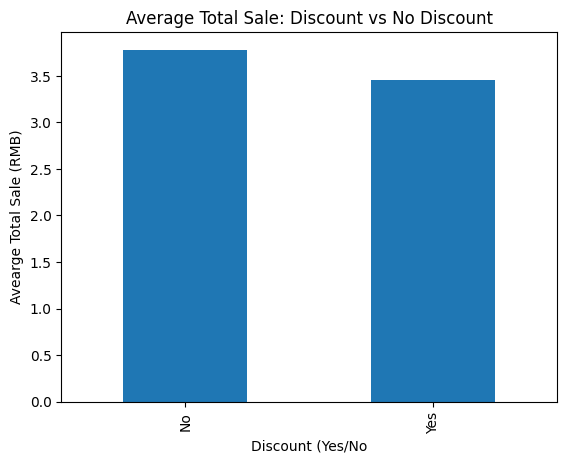

In [17]:
discount_sales = df.groupby('Discount (Yes/No)')['Total Sale'].mean()
print(discount_sales)
drop_col2 = discount_sales.drop('NaN', errors='ignore')
print(drop_col2)

drop_col2.plot(kind= 'bar')
plt.xlabel('Discount (Yes/No')
plt.ylabel('Avearge Total Sale (RMB)')
plt.title('Average Total Sale: Discount vs No Discount')

plt.show()

This chart compares the average total sale per transaction for discounted vs non-discounted items.
The results show that transactions without discounts have a slightly higher average sale value than discounted transactions, suggesting that discounts do not necessarily increase revenue per transaction.